In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Statistics formulae

In [2]:
s = np.random.normal(10, 5, 50)
s

array([ 9.8663461 ,  6.9871212 ,  7.83983704, -0.08603115, 11.30886971,
        9.86095944,  7.45335139,  4.08223532, 14.39212759,  6.02202555,
        8.52746695, 12.07887185, 13.55532536, 10.86113242,  9.28703033,
        6.02262365,  7.87659348,  5.78791474, 18.03455273,  8.97478678,
        5.55713243, 11.00443332, 14.22215495, 18.12971902,  8.3777144 ,
        3.88437814, 10.05167813,  4.85201448,  0.60838603, 19.19124015,
       13.07850739,  8.7861266 ,  7.31921115,  7.95433637, 17.57854854,
       10.2638347 , 10.25499991,  7.13228669, 10.36654023,  8.09981986,
        5.12675519,  8.61203369, 15.21593768,  9.1938838 , 14.64843764,
        4.83297313,  4.55769181,  4.31989985, 10.75219536, 11.30684406])

In [3]:
s = np.floor(s)

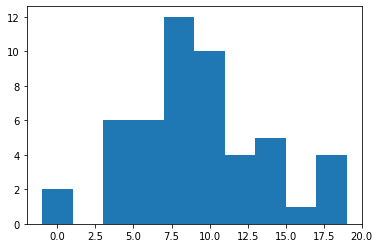

In [4]:
plt.hist(s)
plt.show()

In [5]:
s = pd.DataFrame(s)

In [6]:
s.mean()

0    8.82
dtype: float64

In [7]:
s.median()

0    8.0
dtype: float64

In [8]:
s.mode()

,0
0,7.0
1,8.0
2,10.0


In [9]:
s.var()

0    19.211837
dtype: float64

In [10]:
s.std()

0    4.383131
dtype: float64

# Mall Data

In [11]:
df = pd.read_csv('clustering/clustering_mall_dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


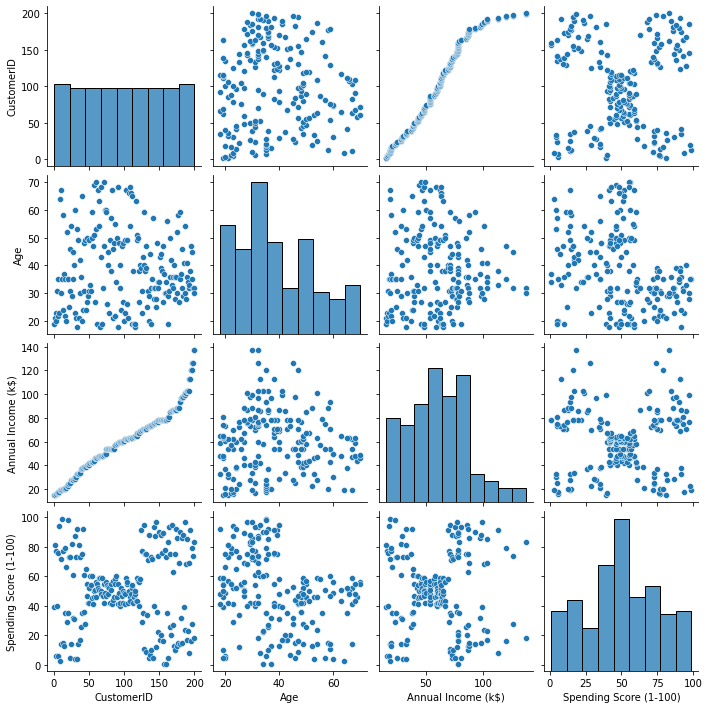

In [12]:
sns.pairplot(df)

### Manually segregating customers into 3 groups/clusters based on Spending Score

In [13]:
def score_tag(score, income):
    if score > 63 and income > 66:
        return "High income high spenders"
    elif score > 63 and income < 40:
        return "Low income high spenders"
    elif score < 40  and income > 66:
        return "High income low spenders"
    elif score < 40  and income < 40:
        return "Low income low spenders"
    else:
        return "Medium income medium spenders"

df["Score Tag"] = df.apply(lambda x: score_tag(x["Spending Score (1-100)"], x["Annual Income (k$)"]), axis=1)

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Score Tag
0,1,Male,19,15,39,Low income low spenders
1,2,Male,21,15,81,Low income high spenders
2,3,Female,20,16,6,Low income low spenders
3,4,Female,23,16,77,Low income high spenders
4,5,Female,31,17,40,Medium income medium spenders
...,...,...,...,...,...,...
195,196,Female,35,120,79,High income high spenders
196,197,Female,45,126,28,High income low spenders
197,198,Male,32,126,74,High income high spenders
198,199,Male,32,137,18,High income low spenders


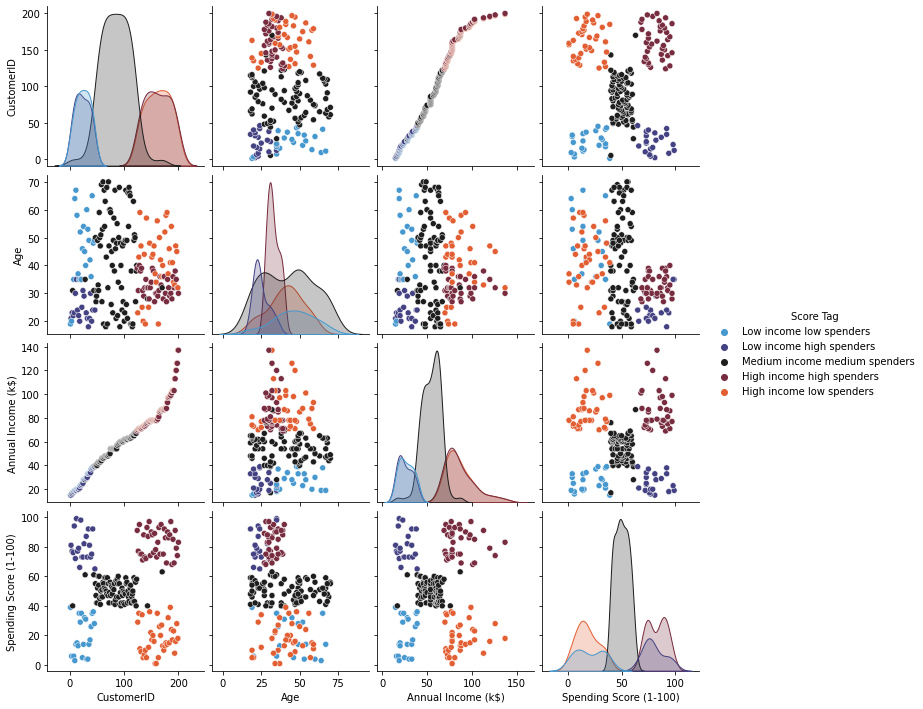

In [15]:
sns.pairplot(df, hue="Score Tag", palette="icefire")

In [16]:
X = df.iloc[:, [3, 4]].values

### KMeans

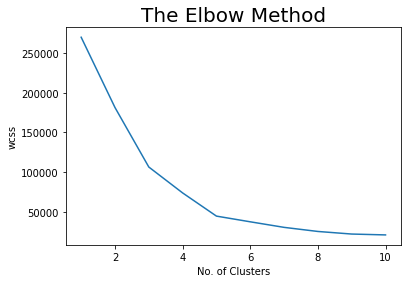

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

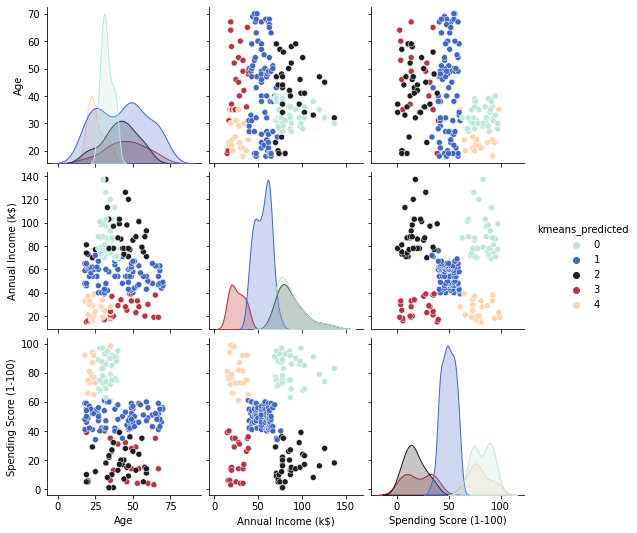

In [18]:
km = KMeans(n_clusters=5)
df["kmeans_predicted"] = km.fit_predict(X)
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "kmeans_predicted", palette="icefire");

### Gaussian Mixture

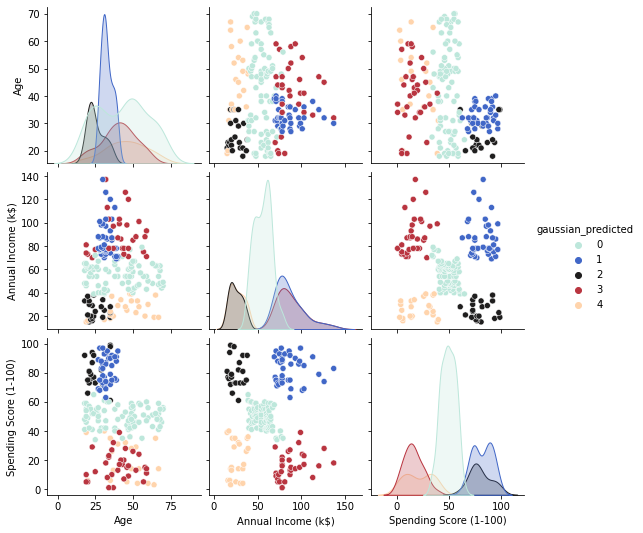

In [19]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=5).fit(X)
df['gaussian_predicted']= gm.predict(X)
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "gaussian_predicted", palette="icefire");

### Agglomerative

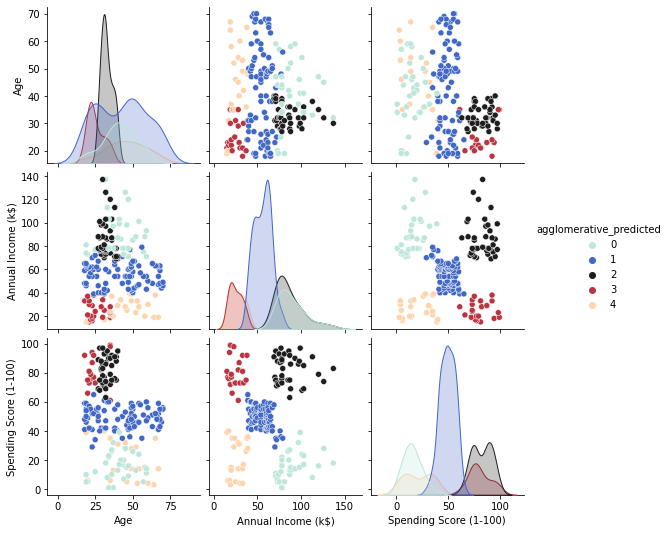

In [20]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5).fit(X)
df['agglomerative_predicted']= ac.fit_predict(X)
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "agglomerative_predicted", palette="icefire");

### Mean Shift

In [21]:
import warnings
warnings.filterwarnings("ignore")

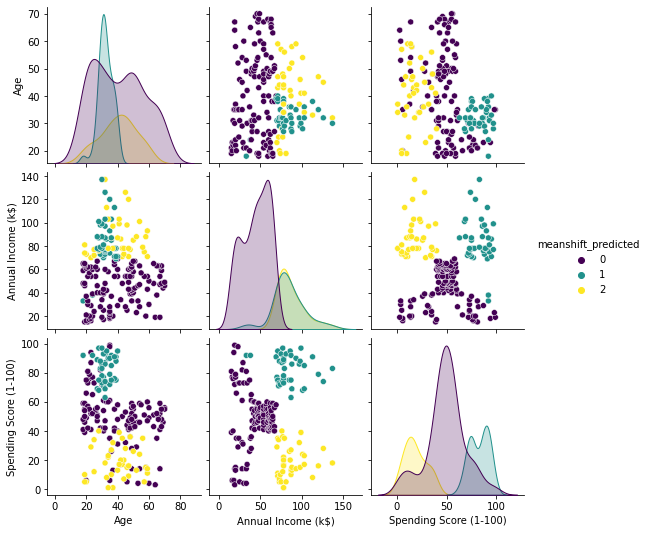

In [22]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth).fit(X)
labels = ms.predict(X)
df['meanshift_predicted'] = labels
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "meanshift_predicted", palette="viridis");

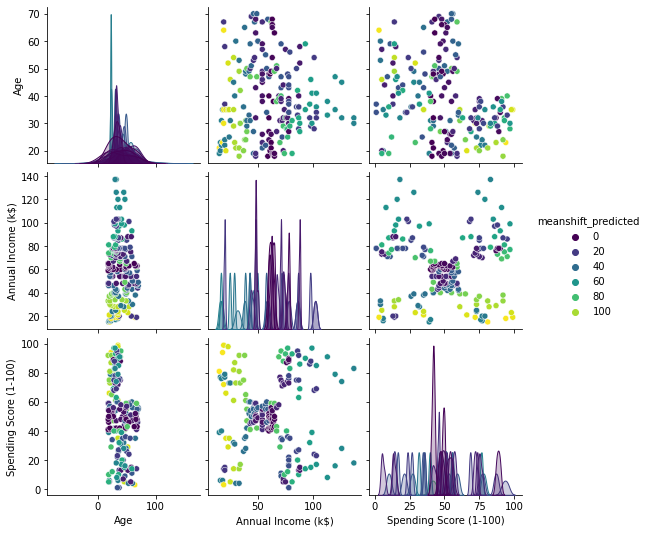

In [23]:
from sklearn.datasets import make_blobs

x, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6)
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)
labels = ms.predict(X)
df['meanshift_predicted'] = labels
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "meanshift_predicted", palette="viridis");